# Momentum Experiments

### Experiment with and without momentum

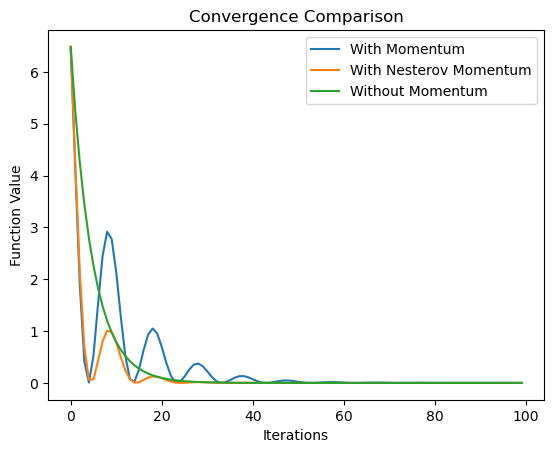

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function
def quadratic_function(x):
    return 0.5 * x**2

# Define the gradient of the quadratic function
def gradient_quadratic_function(x):
    return x

# Gradient descent function without momentum
def gradient_descent_without_momentum(starting_point, learning_rate, n_iterations):
    current_point = starting_point
    history = []

    for _ in range(n_iterations):
        gradient = gradient_quadratic_function(current_point)
        current_point -= learning_rate * gradient
        history.append(quadratic_function(current_point))

    return current_point, history

# Gradient descent function with momentum
def gradient_descent_with_momentum(starting_point, learning_rate, n_iterations, momentum):
    current_point = starting_point
    velocity = 0
    history = []

    for _ in range(n_iterations):
        gradient = gradient_quadratic_function(current_point)  # Assuming this function is defined elsewhere
        velocity = momentum * velocity - learning_rate * gradient
        current_point += velocity
        history.append(quadratic_function(current_point))  # Assuming this function is defined elsewhere

    return current_point, history

# Gradient descent function with Nesterov momentum
def gradient_descent_with_nesterov_momentum(starting_point, learning_rate, n_iterations, momentum):
    current_point = starting_point
    velocity = 0
    history = []

    for _ in range(n_iterations):
        # First, look ahead using current velocity
        look_ahead_point = current_point + momentum * velocity
        gradient = gradient_quadratic_function(look_ahead_point)
        velocity = momentum * velocity - learning_rate * gradient
        current_point += velocity
        history.append(quadratic_function(current_point))

    return current_point, history

# Function to plot convergence
def plot_convergence(history_with_momentum, history_without_momentum, history_with_nesterov_momentum):
    plt.plot(history_with_momentum, label='With Momentum')
    plt.plot(history_with_nesterov_momentum, label='With Nesterov Momentum')
    plt.plot(history_without_momentum, label='Without Momentum')
    plt.title('Convergence Comparison')
    plt.xlabel('Iterations')
    plt.ylabel('Function Value')
    plt.legend()
    plt.show()

# Parameters
starting_point = 4
learning_rate = 0.1
n_iterations = 100
momentum = 0.9

# Perform gradient descent with and without momentum
_, history_with_momentum = gradient_descent_with_momentum(starting_point, learning_rate, n_iterations, momentum)
_, history_without_momentum = gradient_descent_without_momentum(starting_point, learning_rate, n_iterations)
_, history_with_nesterov_momentum = gradient_descent_with_nesterov_momentum(starting_point, learning_rate, n_iterations, momentum)

# Plot convergence
plot_convergence(history_with_momentum, history_without_momentum, history_with_nesterov_momentum)
